# **CSE 432 ML Project**

Loading drive and packages

In [63]:

import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
filelist = glob.glob('/content/drive/MyDrive/DataSet1/**/*.csv', recursive=True)

len(filelist)

520

In [65]:
df = pd.DataFrame.from_dict(filelist)
df.head()

,0
0,/content/drive/MyDrive/DataSet1/User4/58_MetaW...
1,/content/drive/MyDrive/DataSet1/User4/26_MetaW...
2,/content/drive/MyDrive/DataSet1/User4/24_MetaW...
3,/content/drive/MyDrive/DataSet1/User4/58_MetaW...
4,/content/drive/MyDrive/DataSet1/User4/25_MetaW...


In [66]:
df.rename(columns={0:'[Path]'}, inplace=True)
df.head()

,[Path]
0,/content/drive/MyDrive/DataSet1/User4/58_MetaW...
1,/content/drive/MyDrive/DataSet1/User4/26_MetaW...
2,/content/drive/MyDrive/DataSet1/User4/24_MetaW...
3,/content/drive/MyDrive/DataSet1/User4/58_MetaW...
4,/content/drive/MyDrive/DataSet1/User4/25_MetaW...


In [67]:
import os

In [68]:
df['file'] = df['[Path]'].apply(lambda x: os.path.basename(x))
df.head()

,[Path],file
0,/content/drive/MyDrive/DataSet1/User4/58_MetaW...,58_MetaWear_2019-09-14T16.41.48.112_F1E55E2FE9...
1,/content/drive/MyDrive/DataSet1/User4/26_MetaW...,26_MetaWear_2019-09-14T15.12.26.969_F1E55E2FE9...
2,/content/drive/MyDrive/DataSet1/User4/24_MetaW...,24_MetaWear_2019-09-14T15.07.14.874_F1E55E2FE9...
3,/content/drive/MyDrive/DataSet1/User4/58_MetaW...,58_MetaWear_2019-09-14T16.41.48.112_F1E55E2FE9...
4,/content/drive/MyDrive/DataSet1/User4/25_MetaW...,25_MetaWear_2019-09-14T15.10.16.700_F1E55E2FE9...


In [69]:
df['expID'] = df['file'].apply(lambda x: x.split('_')[0])

In [70]:
df.head()

,[Path],file,expID
0,/content/drive/MyDrive/DataSet1/User4/58_MetaW...,58_MetaWear_2019-09-14T16.41.48.112_F1E55E2FE9...,58
1,/content/drive/MyDrive/DataSet1/User4/26_MetaW...,26_MetaWear_2019-09-14T15.12.26.969_F1E55E2FE9...,26
2,/content/drive/MyDrive/DataSet1/User4/24_MetaW...,24_MetaWear_2019-09-14T15.07.14.874_F1E55E2FE9...,24
3,/content/drive/MyDrive/DataSet1/User4/58_MetaW...,58_MetaWear_2019-09-14T16.41.48.112_F1E55E2FE9...,58
4,/content/drive/MyDrive/DataSet1/User4/25_MetaW...,25_MetaWear_2019-09-14T15.10.16.700_F1E55E2FE9...,25


In [71]:
df['expID'].value_counts()

,count
expID,
113,8
58,4
74,4
109,4
107,4
...,...
17,4
19,4
20,4


Split files into seperate rows based on sensor

In [72]:
df['sensor'] = df['file'].apply(lambda x: x.split('_')[4])
df['frequency'] = df['file'].apply(lambda x: x.split('_')[5])
df.head()

,[Path],file,expID,sensor,frequency
0,/content/drive/MyDrive/DataSet1/User4/58_MetaW...,58_MetaWear_2019-09-14T16.41.48.112_F1E55E2FE9...,58,Magnetometer,20.000Hz
1,/content/drive/MyDrive/DataSet1/User4/26_MetaW...,26_MetaWear_2019-09-14T15.12.26.969_F1E55E2FE9...,26,Pressure,7.330Hz
2,/content/drive/MyDrive/DataSet1/User4/24_MetaW...,24_MetaWear_2019-09-14T15.07.14.874_F1E55E2FE9...,24,Magnetometer,20.000Hz
3,/content/drive/MyDrive/DataSet1/User4/58_MetaW...,58_MetaWear_2019-09-14T16.41.48.112_F1E55E2FE9...,58,Pressure,7.330Hz
4,/content/drive/MyDrive/DataSet1/User4/25_MetaW...,25_MetaWear_2019-09-14T15.10.16.700_F1E55E2FE9...,25,Pressure,7.330Hz


In [73]:
df.dtypes

,0
[Path],object
file,object
expID,object
sensor,object
frequency,object


In [74]:
df['expID'] = df['expID'].astype('int32')


Dictonary of all the activities

In [75]:
expDic = {1: "Sitting & Reading Book",2: "Sitting & Writing on a notebook", 3: "typing and using a computer", 4: "Browsing Using a Computer", 5: "Moving head & body while sitting",
          6: "Moving chair While sitting", 7: "Stand up from sitting", 8: "Standing", 9: "Walking", 10: "Running", 11: "taking stairs"}

Formula to translate ## into actvity

In [76]:
def exp_NO(expID):
  if expID %11 == 0:
    return 11
  return expID %11

def exp_Name(exp_No):
  return expDic[exp_No]

In [77]:
df['exp_No'] = df['expID'].apply(exp_NO)
df['exp_Name'] = df['exp_No'].apply(exp_Name)
df.tail()

,[Path],file,expID,sensor,frequency,exp_No,exp_Name
515,/content/drive/MyDrive/DataSet1/User8/88_MetaW...,88_MetaWear_2019-11-18T14.49.51.662_F1E55E2FE9...,88,Pressure,7.330Hz,11,taking stairs
516,/content/drive/MyDrive/DataSet1/User8/86_MetaW...,86_MetaWear_2019-11-18T14.43.04.692_F1E55E2FE9...,86,Magnetometer,20.000Hz,9,Walking
517,/content/drive/MyDrive/DataSet1/User8/79_MetaW...,79_MetaWear_2019-11-18T14.10.18.070_F1E55E2FE9...,79,Magnetometer,20.000Hz,2,Sitting & Writing on a notebook
518,/content/drive/MyDrive/DataSet1/User8/84_MetaW...,84_MetaWear_2019-11-18T14.35.18.207_F1E55E2FE9...,84,Magnetometer,20.000Hz,7,Stand up from sitting
519,/content/drive/MyDrive/DataSet1/User8/87_MetaW...,87_MetaWear_2019-11-18T14.46.07.609_F1E55E2FE9...,87,Accelerometer,100.000Hz,10,Running


**sitting and reading a book** -> seperate all users

In [78]:
reading_book_df = df[df['exp_No'] == 1]
reading_book_df["sensor"].value_counts()


,count
sensor,
Accelerometer,11
Gyroscope,11
Pressure,11
Magnetometer,11


In [79]:
def fig_accelerometer(file):
  data_acc = pd.read_csv(file)
  data_acc.columns= ['timestamp', 'time', 'elapsed', 'x', 'y', 'z']
  fig, axarr = plt.subplots(1,1 , sharex = True, figsize = (8, 6))
  data_acc = data_acc[['x', 'y', 'z']]
  axarr.plot(data_acc)
  axarr.grid()
  axarr.legend()
  plt.show()

# **Acceleromerer, Gyroscope, and Magnetometer Graphs for reading book and sitting down**

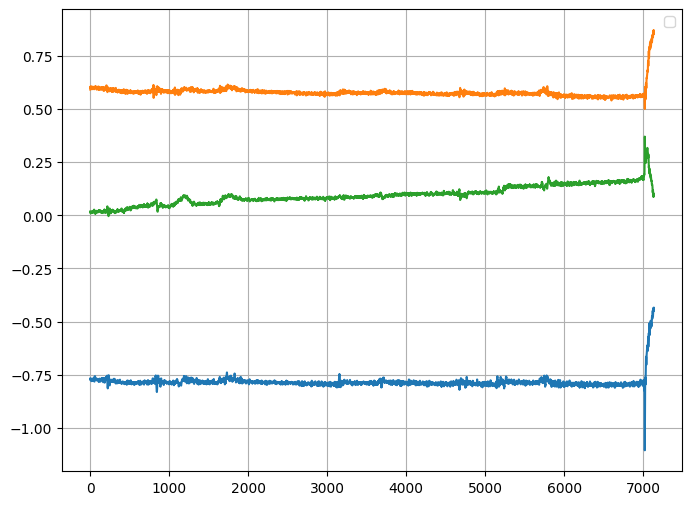

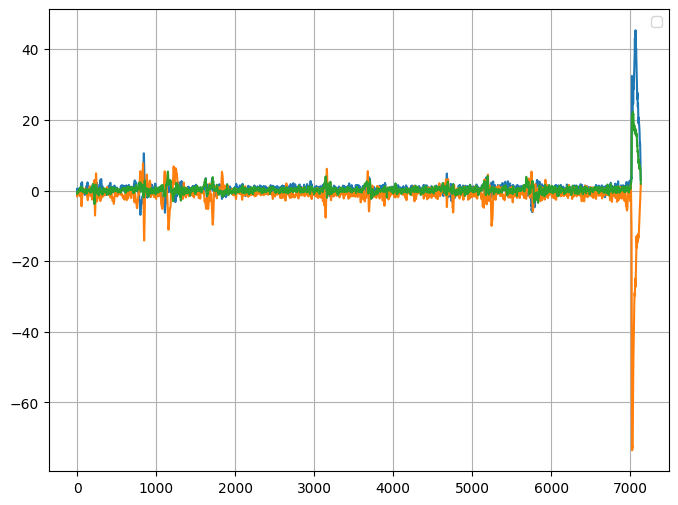

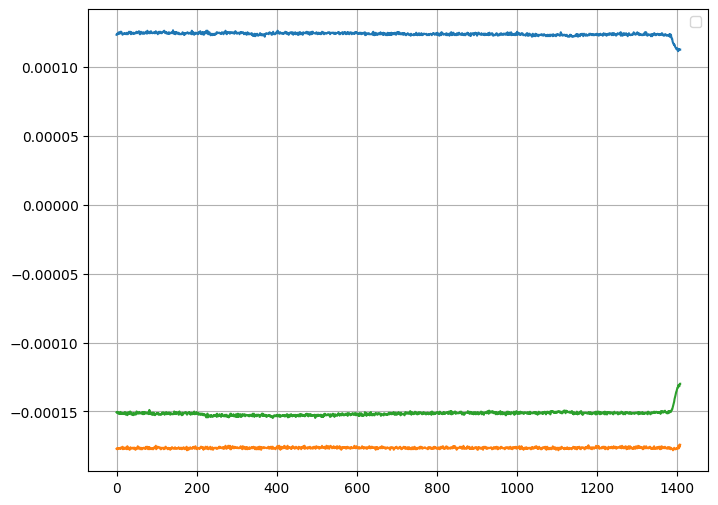

In [80]:
fig_accelerometer(reading_book_df[reading_book_df['sensor'] == "Accelerometer"].iloc[1, :]["[Path]"])
fig_accelerometer(reading_book_df[reading_book_df['sensor'] == "Gyroscope"].iloc[1, :]["[Path]"])
##fig_accelerometer(reading_book_df[reading_book_df['sensor'] == "Pressure"].iloc[1, :]["[Path]"])
fig_accelerometer(reading_book_df[reading_book_df['sensor'] == "Magnetometer"].iloc[1, :]["[Path]"])




In [81]:
writing_notebook_df = df[df['exp_No'] == 2]
writing_notebook_df["sensor"].value_counts()



,count
sensor,
Magnetometer,12
Pressure,12
Accelerometer,12
Gyroscope,12


# **Acceleromerer, Gyroscope, and Magnetometer Graphs for writing in a notebook**

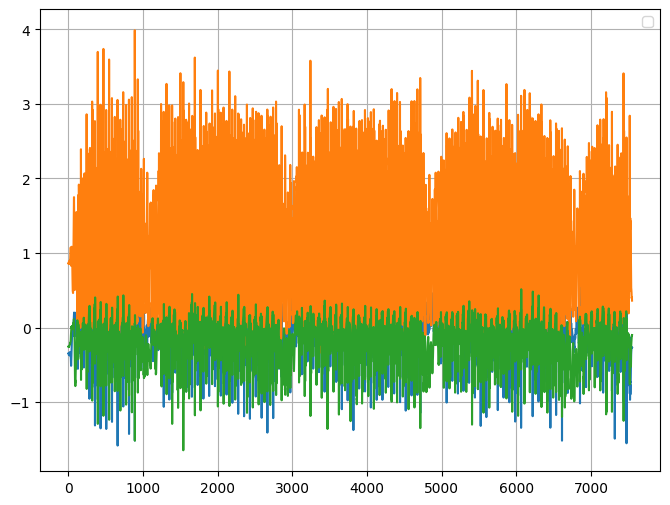

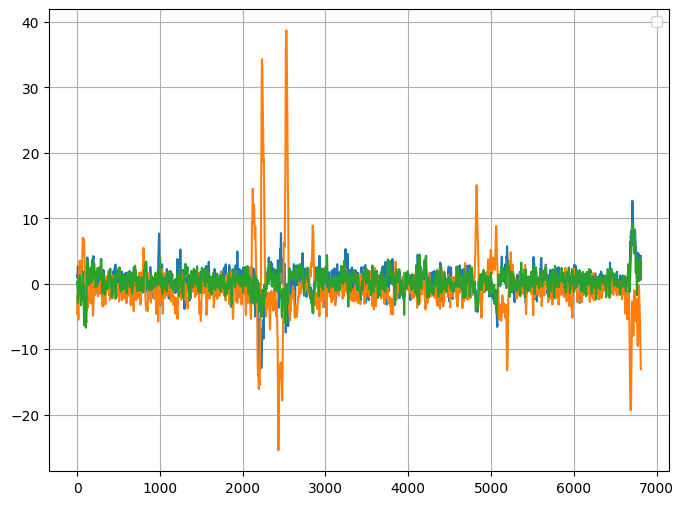

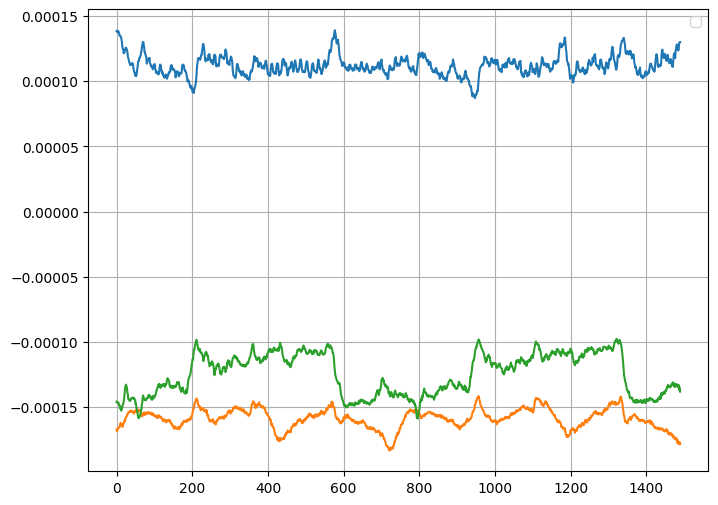

In [82]:
fig_accelerometer(writing_notebook_df[writing_notebook_df['sensor'] == "Accelerometer"].iloc[1, :]["[Path]"])
fig_accelerometer(writing_notebook_df[writing_notebook_df['sensor'] == "Gyroscope"].iloc[1, :]["[Path]"])
##fig_accelerometer(reading_book_df[reading_book_df['sensor'] == "Pressure"].iloc[1, :]["[Path]"])
fig_accelerometer(writing_notebook_df[writing_notebook_df['sensor'] == "Magnetometer"].iloc[1, :]["[Path]"])


In [83]:
typing_computer_df = df[df['exp_No'] == 3]
typing_computer_df["sensor"].value_counts()

,count
sensor,
Magnetometer,13
Pressure,13
Gyroscope,13
Accelerometer,13


# **Acceleromerer, Gyroscope, and Magnetometer Graphs for typing computer**

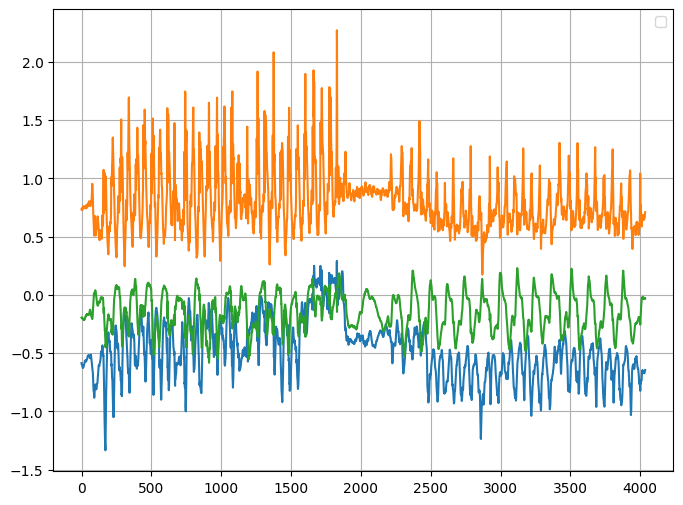

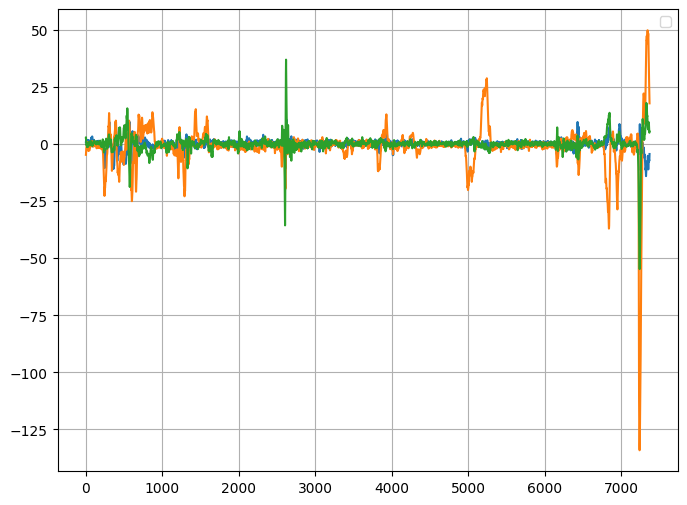

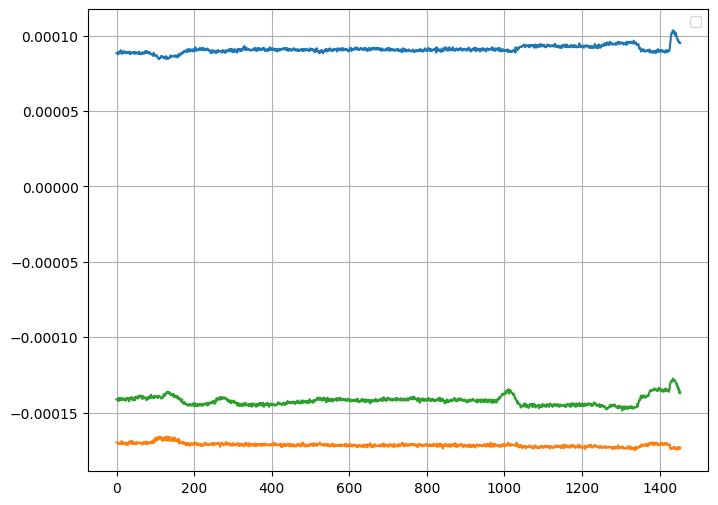

In [84]:
fig_accelerometer(typing_computer_df[typing_computer_df['sensor'] == "Accelerometer"].iloc[1, :]["[Path]"])
fig_accelerometer(typing_computer_df[typing_computer_df['sensor'] == "Gyroscope"].iloc[1, :]["[Path]"])
##fig_accelerometer(reading_book_df[reading_book_df['sensor'] == "Pressure"].iloc[1, :]["[Path]"])
fig_accelerometer(typing_computer_df[typing_computer_df['sensor'] == "Magnetometer"].iloc[1, :]["[Path]"])

In [85]:
browsing_df = df[df['exp_No'] == 4]
browsing_df["sensor"].value_counts()

,count
sensor,
Pressure,12
Magnetometer,12
Gyroscope,12
Accelerometer,12


# **Accelerometer, Gyroscope, and Magentometer for browsing**

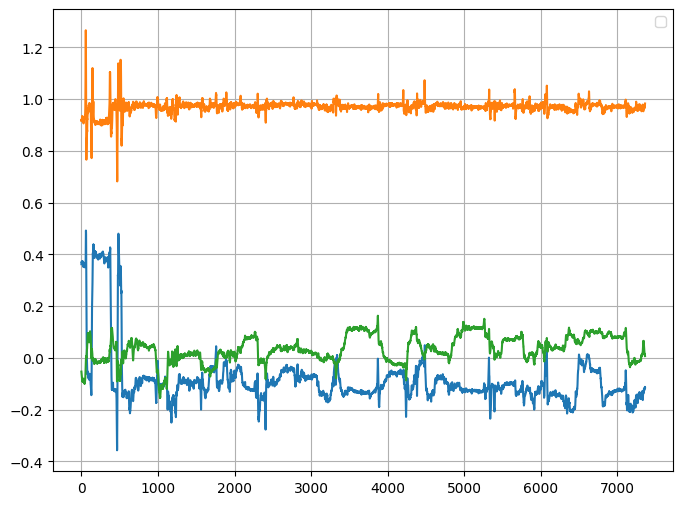

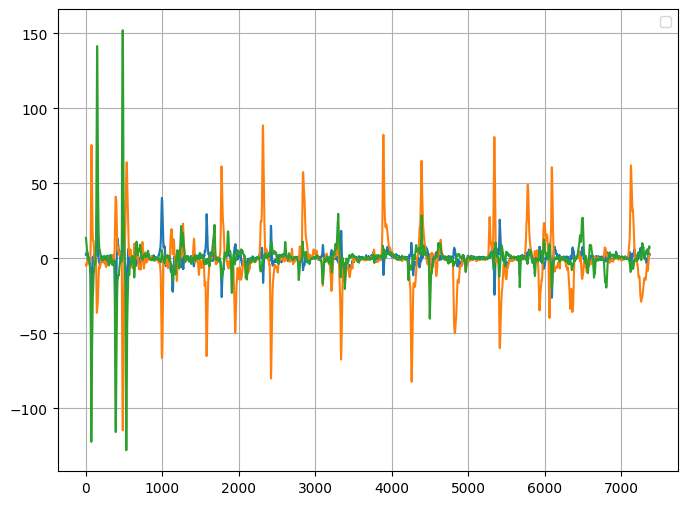

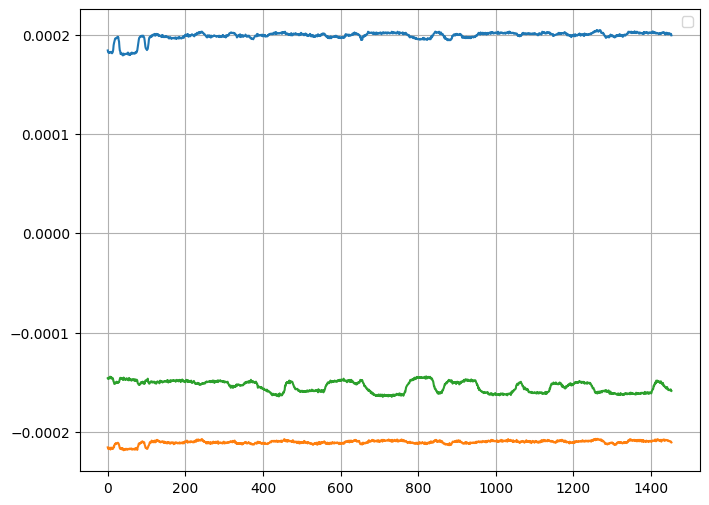

In [86]:
fig_accelerometer(browsing_df[browsing_df['sensor'] == "Accelerometer"].iloc[1, :]["[Path]"])
fig_accelerometer(browsing_df[browsing_df['sensor'] == "Gyroscope"].iloc[1, :]["[Path]"])
##fig_accelerometer(reading_book_df[reading_book_df['sensor'] == "Pressure"].iloc[1, :]["[Path]"])
fig_accelerometer(browsing_df[browsing_df['sensor'] == "Magnetometer"].iloc[1, :]["[Path]"])

# **Feature Extraction**

In [87]:
from scipy import stats

result_list = []
for exp_id in df['expID'].value_counts().index:
  temp_df = df[df['expID'] == exp_id]
  acc_df = pd.read_csv(temp_df[temp_df['sensor'] == "Accelerometer"].iloc[0, 0])
  acc_df.rename(columns= {'x-axis (g)': 'x', 'y-axis (g)': 'y', 'z-axis (g)' : 'z'}, inplace=True)
  acc_df = acc_df[['x', 'y', 'z']]

  gyro_df = pd.read_csv(temp_df[temp_df['sensor'] == "Gyroscope"].iloc[0, 0])
  gyro_df.rename(columns= {'x-axis (deg/s)': 'x', 'y-axis (deg/s)': 'y', 'z-axis (deg/s)' : 'z'}, inplace=True)
  gyro_df = gyro_df[['x', 'y', 'z']]

  window_size = 100

  for i in range(0, len(acc_df), window_size):
    window_acc_data = acc_df.iloc[i:i+window_size]


    #features, used some from towards data science, https://towardsdatascience.com/feature-engineering-on-time-series-data-transforming-signal-data-of-a-smartphone-accelerometer-for-72cbe34b8a60

    mean_acc_x = window_acc_data['x'].mean()
    mean_acc_y = window_acc_data['y'].mean()
    mean_acc_z = window_acc_data['z'].mean()
    acc_x_var = window_acc_data['x'].var()
    acc_y_var = window_acc_data['y'].var()
    acc_z_var = window_acc_data['z'].var()
    acc_sumxyz =window_acc_data.sum()
    acc_maxxyz = window_acc_data.max()
    acc_minxyz = window_acc_data.min()
    acc_abssum = window_acc_data.abs().sum()
    acc_abssum_mean = acc_abssum.mean()
    acc_abssum_var = acc_abssum.var()

    acc_rms = np.sqrt(np.mean(np.square(window_acc_data)))
    acc_corr_xy = np.correlate(window_acc_data['x'], window_acc_data['y'])[0]
    acc_corr_yz = np.correlate(window_acc_data['y'], window_acc_data['z'])[0]
    acc_corr_xz = np.correlate(window_acc_data['x'], window_acc_data['z'])[0]
    acc_sma = np.sum(np.abs(window_acc_data)) / len(window_acc_data)
    acc_entropy = stats.entropy(window_acc_data.values.flatten())
    acc_skewness = stats.skew(window_acc_data.values, axis=0)
    acc_kurtosis = stats.kurtosis(window_acc_data.values, axis=0)
    acc_iqr = np.percentile(window_acc_data, 75, axis=0) - np.percentile(window_acc_data, 25, axis=0)

    acc_peak_to_peak = np.ptp(window_acc_data, axis=0)

    window_gyro_data = gyro_df.iloc[i:i+window_size]
    gyro_x_mean = window_gyro_data['x'].mean()
    gyro_y_mean = window_gyro_data['y'].mean()
    gyro_z_mean = window_gyro_data['z'].mean()
    gyro_x_var = window_gyro_data['x'].var()
    gyro_y_var = window_gyro_data['y'].var()
    gyro_z_var = window_gyro_data['z'].var()
    gyro_sumxyz = window_gyro_data.sum()
    gyro_maxxyz = window_gyro_data.max()
    gyro_minxyz = window_gyro_data.min()
    gyro_abssum = window_gyro_data.abs().sum()
    gyro_abssum_mean = gyro_abssum.mean()
    gyro_abssum_var = gyro_abssum.var()
    gyro_rms = np.sqrt(np.mean(np.square(window_gyro_data)))
    gyro_corr_xy = np.correlate(window_gyro_data['x'], window_gyro_data['y'])[0]
    gyro_corr_yz = np.correlate(window_gyro_data['y'], window_gyro_data['z'])[0]
    gyro_corr_xz = np.correlate(window_gyro_data['x'], window_gyro_data['z'])[0]
    gyro_sma = np.sum(np.abs(window_gyro_data)) / len(window_gyro_data)
    gyro_entropy = stats.entropy(window_gyro_data.values.flatten())
    gyro_skewness = stats.skew(window_gyro_data.values, axis=0)
    gyro_kurtosis = stats.kurtosis(window_gyro_data.values, axis=0)
    gyro_iqr = np.percentile(window_gyro_data, 75, axis=0) - np.percentile(window_gyro_data, 25, axis=0)

    gyro_peak_to_peak = np.ptp(window_gyro_data, axis=0)

    result_list.append([
      mean_acc_x, mean_acc_y, mean_acc_z,
      acc_x_var, acc_y_var, acc_z_var,
      acc_sumxyz['x'], acc_sumxyz['y'], acc_sumxyz['z'],
      acc_maxxyz['x'], acc_maxxyz['y'], acc_maxxyz['z'],
      acc_minxyz['x'], acc_minxyz['y'], acc_minxyz['z'],
      acc_abssum['x'], acc_abssum['y'], acc_abssum['z'],
      acc_abssum_mean, acc_abssum_var,
      acc_rms,
      acc_corr_xy, acc_corr_yz, acc_corr_xz,
      acc_sma,
      acc_entropy,
      acc_skewness[0], acc_skewness[1], acc_skewness[2],
      acc_kurtosis[0], acc_kurtosis[1], acc_kurtosis[2],
      acc_iqr[0], acc_iqr[1], acc_iqr[2],
      acc_peak_to_peak[0], acc_peak_to_peak[1], acc_peak_to_peak[2],
      gyro_x_mean, gyro_y_mean, gyro_z_mean,
      gyro_x_var, gyro_y_var, gyro_z_var,
      gyro_sumxyz['x'], gyro_sumxyz['y'], gyro_sumxyz['z'],
      gyro_maxxyz['x'], gyro_maxxyz['y'], gyro_maxxyz['z'],
      gyro_minxyz['x'], gyro_minxyz['y'], gyro_minxyz['z'],
      gyro_abssum['x'], gyro_abssum['y'], gyro_abssum['z'],
      gyro_abssum_mean, gyro_abssum_var,
      gyro_rms,
      gyro_corr_xy, gyro_corr_yz, gyro_corr_xz,
      gyro_sma,
      gyro_entropy,
      gyro_skewness[0], gyro_skewness[1], gyro_skewness[2],
      gyro_kurtosis[0], gyro_kurtosis[1], gyro_kurtosis[2],
      gyro_iqr[0], gyro_iqr[1], gyro_iqr[2],
      gyro_peak_to_peak[0], gyro_peak_to_peak[1], gyro_peak_to_peak[2],
      temp_df[temp_df['sensor'] == "Accelerometer"].iloc[0,5]
    ])




In [88]:
# Import required libraries
from google.colab import files, drive
import nbconvert
import pdfkit
import os

def convert_notebook_to_pdf(notebook_name, output_name):


    # Set paths
    notebook_path = f'/content/drive/MyDrive/Colab Notebooks/{notebook_name}'
    html_path = '/content/temp.html'
    output_path = f'/content/drive/MyDrive/Colab Notebooks/{output_name}'

    # Convert notebook to HTML
    os.system(f'jupyter nbconvert --to html "{notebook_path}" --output "{html_path}"')

    # Convert HTML to PDF
    pdfkit.from_file(html_path, output_path)

    print(f"PDF saved as {output_path}")

    # Download the PDF
    files.download(output_path)

    # Clean up temporary HTML file
    os.remove(html_path)

# Install required packages
!pip install pdfkit
!apt-get install -y wkhtmltopdf

# Usage
notebook_name = 'CSE432.ipynb'  # Replace with your notebook's name
output_name = 'CSE432.pdf'  # Replace with your desired output name

# Convert and download
convert_notebook_to_pdf(notebook_name, output_name)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
wkhtmltopdf is already the newest version (0.12.6-2).
0 upgraded, 0 newly installed, 0 to remove and 48 not upgraded.
PDF saved as /content/drive/MyDrive/Colab Notebooks/CSE432.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>